In [ ]:
# Домашнє завдання. Частина перша
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [56]:
#Вивести перші рядки таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" за допомогою методу head
p1 = pd.read_html(
    io='https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8',
    match='Коефіцієнт народжуваності в регіонах',
    thousands="", decimal=','
)

In [57]:
#Визначте кількість рядків та стовпців у датафреймі
table=p1[0]
table.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [37]:
#Визначте кількість рядків та стовпців у датафреймі
print(table.shape)

(28, 9)


In [38]:
#Замініть у таблиці значення "—" на значення NaN
p =table.replace(to_replace='—',
                value=np.nan,
                inplace=True)
table

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [40]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
print(table.dtypes)


Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [39]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
for index, column in enumerate(table):
    if index != 0 and table[column].dtype == object:
        table[column] = pd.to_numeric(table[column], errors='coerce')

column_types = table.dtypes

print(column_types)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [41]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
missing_values_ratio = table.isnull().sum() / len(table)* 100

print(missing_values_ratio)

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64


In [42]:
table.drop(index=len(p1[0]) - 1, inplace=True)
table



,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [43]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
p=table.fillna({i: p1[0][i].mean() for i in table if i != 'Регіон'})
p

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000,20.600000,16.0,13.0,7.3,12.6,11.144,8.017391
1,Вінницька,22.400,19.200000,14.2,12.4,8.4,11.2,10.900,7.600000
2,Волинська,24.700,25.000000,17.9,15.3,11.2,14.8,14.100,10.100000
3,Дніпропетровська,20.400,20.400000,15.1,12.3,7.1,11.2,11.100,7.100000
4,Донецька,27.100,21.400000,14.0,10.9,6.1,9.8,8.200,8.017391
5,Житомирська,26.100,22.300000,15.9,12.9,8.9,12.2,12.000,7.900000
6,Закарпатська,31.400,27.300000,20.7,16.8,11.5,15.1,14.600,10.400000
7,Запорізька,21.900,19.700000,15.0,12.4,7.1,10.6,10.600,6.800000
8,Івано-Франківська,24.300,24.800000,18.2,15.5,10.3,12.4,12.200,8.800000
9,Київська,20.400,18.900000,15.6,12.3,7.3,12.2,12.100,8.000000


In [46]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
avg_br = table['2019'].mean()
print(avg_br)
above_avg_br = table[table['2019'] > avg_br][['Регіон', '2019']]

above_avg_br

8.017391304347827


,Регіон,2019
2,Волинська,10.1
6,Закарпатська,10.4
8,Івано-Франківська,8.8
12,Львівська,8.7
14,Одеська,8.8
16,Рівненська,10.7
20,Херсонська,8.1
23,Чернівецька,9.2
25,Київ,11.0


In [47]:
#У якому регіоні була найвища народжуваність у 2014 році?
max_br = table['2014'].max()
print(max_br)
eq_avg_br =table[table['2014'] == max_br][['Регіон', '2014']]
print(eq_avg_br)

14.8
        Регіон  2014
16  Рівненська  14.8


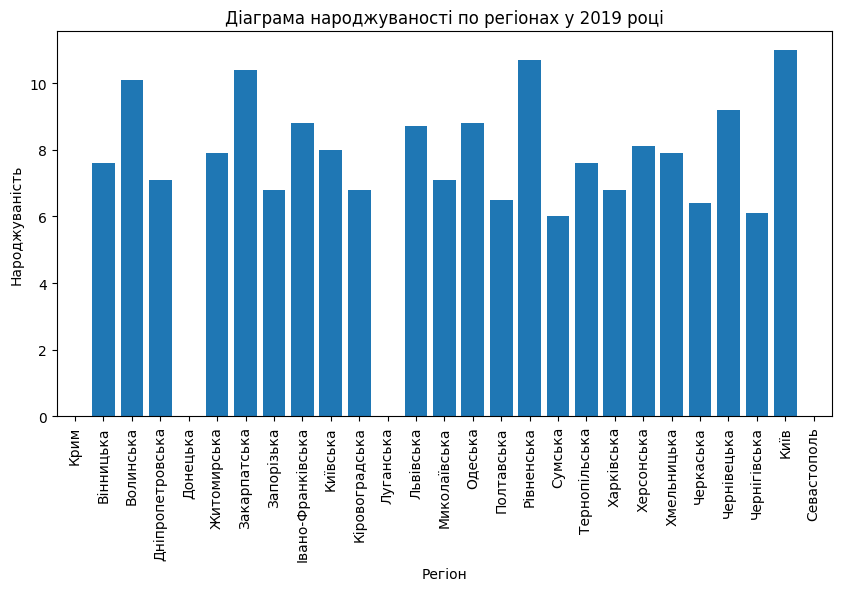

In [49]:
#Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
plt.figure(figsize=(10, 5))
plt.bar(table['Регіон'], table['2019'])
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.title('Діаграма народжуваності по регіонах у 2019 році')
plt.xticks(rotation=90)
plt.show()

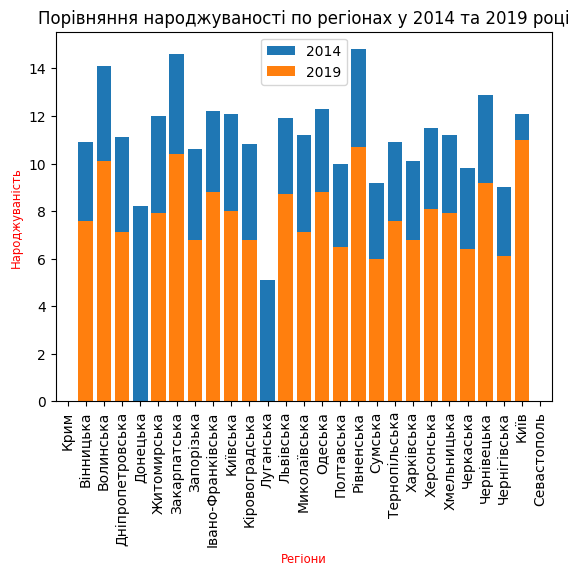

In [50]:
y1 = table['2019']
y2 = table['2014']
x = table['Регіон']
plt.bar(x, y2, label="2014")
plt.bar(x, y1, label="2019")
plt.xlabel('Регіони', fontsize='small', color='red')
plt.ylabel('Народжуваність', fontsize='small', color='red')
plt.title('Порівняння народжуваності по регіонах у 2014 та 2019 році')
plt.xticks(rotation=90)
plt.legend()
plt.show()

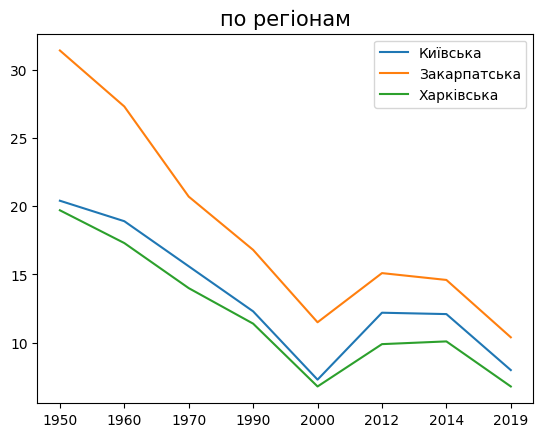

In [51]:
x = table.columns.tolist()[1:]
y1 = table.loc[9].tolist()[1:]
y2 = table.loc[6].tolist()[1:]
y3 = table.loc[19].tolist()[1:]
fig, axs = plt.subplots()
axs.plot(x, y1, label='Київська')
axs.plot(x, y2, label='Закарпатська')
axs.plot(x, y3, label='Харківська')
plt.title('по регіонам', fontsize=15)
plt.legend()
plt.show()

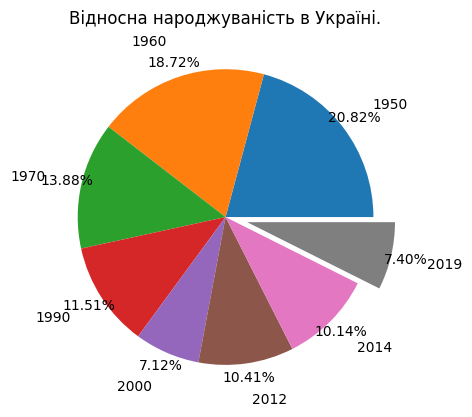

In [58]:
labels = np.array(table.columns)[1:]
data = np.array(table[table['Регіон'] == 'Україна'].iloc[0][1:])
explode = [0 for _ in table[table['Регіон'] == 'Україна']][:-2] + [0.15]
plt.pie(
    data,
    labels=labels,
    shadow=False,
    explode=explode,
    autopct="%.2f%%",
    pctdistance=1.10,
    labeldistance=1.25,
)

plt.title('Відносна народжуваність в Україні.', fontsize=12)
plt.show()

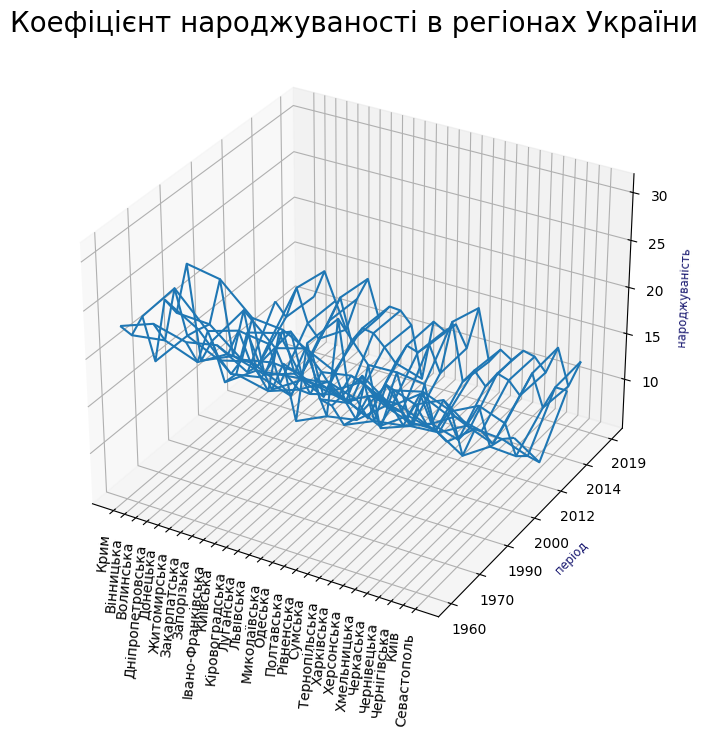

In [55]:
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(projection="3d")

xl = np.array(table['Регіон'])
yl = np.array(table.columns)[1:]
plt.xticks(ticks=np.arange(0, xl.shape[0]), labels=xl, rotation=85)
plt.yticks(ticks=np.arange(0, yl.shape[0]), labels=yl)
plt.xlabel(' ', fontsize='small', color='midnightblue')
plt.ylabel('період', fontsize='small', color='midnightblue')
ax.set_zlabel('народжуваність', fontsize='small', color='midnightblue')
plt.title('Коефіцієнт народжуваності в регіонах України', fontsize=20)

x, y = np.meshgrid(
    np.arange(0, xl.shape[0]), np.arange(1, yl.shape[0]))

ax.plot_wireframe(
                  x,
                  y,
                  table.to_numpy()[x, y],
                  )

plt.show()